In [120]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.api import OLS
import matplotlib.pyplot as plt

Vamos inicialmente analisar a série de fechamento da Eletrobras.

In [121]:
ELET_df = pd.read_excel('ELET3.xlsx', sheet_name= "normal")
ELET_df['Data'] = pd.to_datetime(ELET_df['Data'])
ELET_df['ELET_diff'] = ELET_df['ELET3'].diff()
ELET_df = ELET_df.dropna()
ELET_df

,Data,ELET3,DIFF_ELET3,LN_ELET,LN_ELET_DIFF,ELET_diff
1,2011-02-28,15.362772,0.719108,2.731947,0.047939,0.719108
2,2011-03-31,16.127641,0.764870,2.780535,0.048588,0.764870
3,2011-04-29,14.975369,-1.152272,2.706407,-0.074128,-1.152272
4,2011-05-31,14.643663,-0.331706,2.684008,-0.022399,-0.331706
5,2011-06-30,14.238725,-0.404938,2.655965,-0.028042,-0.404938
...,...,...,...,...,...,...
154,2023-11-30,4.860000,-29.980000,1.581038,-1.969728,-29.980000
155,2023-12-28,42.430000,37.570000,3.747856,2.166817,37.570000
156,2024-01-31,4.810000,-37.620000,1.570697,-2.177159,-37.620000
157,2024-02-29,43.500000,38.690000,3.772761,2.202064,38.690000


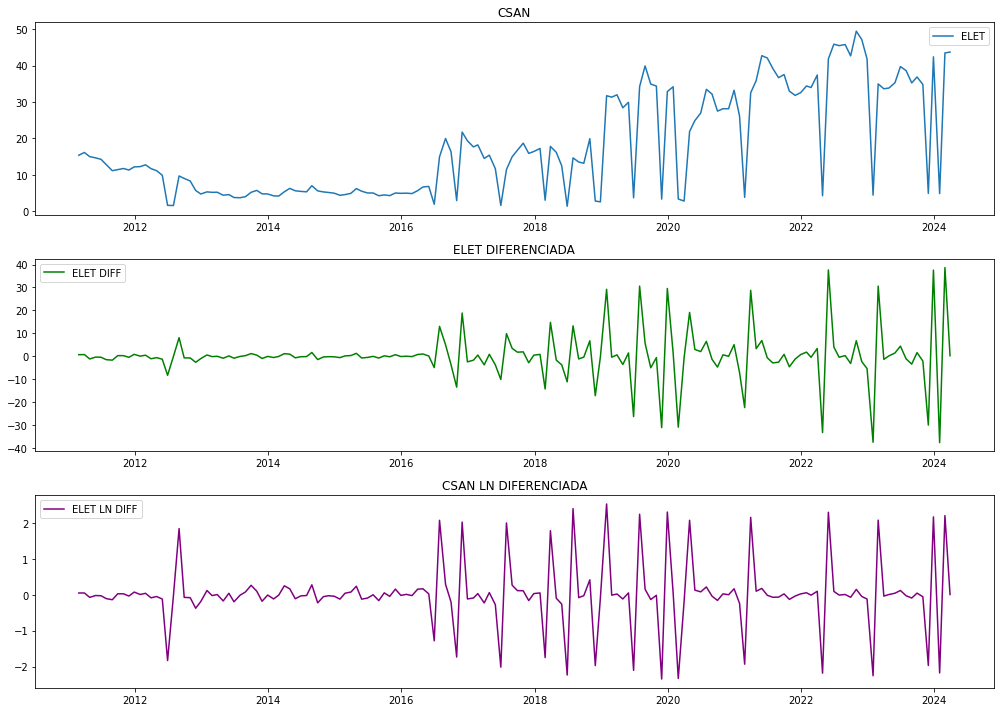

In [123]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(ELET_df['Data'] , ELET_df['ELET3'], label='ELET')
plt.title('CSAN')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ELET_df['Data'], ELET_df['ELET_diff'], label='ELET DIFF', color='green')
plt.title('ELET DIFERENCIADA')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ELET_df['Data'] ,ELET_df['LN_ELET_DIFF'], label='ELET LN DIFF', color='purple')
plt.title('CSAN LN DIFERENCIADA')
plt.legend()

plt.tight_layout()
plt.show()

In [124]:
# Function to perform the ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
# Apply the ADF test on each series
print("ELET:")
adf_test(ELET_df['ELET3'])

print("\nELET DIFF:")
adf_test(ELET_df['ELET_diff'])

print("\nELET LN:")
adf_test(ELET_df['LN_ELET'])

print("\nELET LN DIFF:")
adf_test(ELET_df['LN_ELET_DIFF'])

ELET:
Results of Dickey-Fuller Test:
Test Statistic                  -0.581357
p-value                          0.875139
#Lags Used                      12.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64

ELET DIFF:
Results of Dickey-Fuller Test:
Test Statistic                  -4.493576
p-value                          0.000202
#Lags Used                      11.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64

ELET LN:
Results of Dickey-Fuller Test:
Test Statistic                  -0.898009
p-value                          0.788628
#Lags Used                      12.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical 

In [125]:
print(ELET_df.info())
print(ELET_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          158 non-null    datetime64[ns]
 1   ELET3         158 non-null    float64       
 2   DIFF_ELET3    158 non-null    float64       
 3   LN_ELET       158 non-null    float64       
 4   LN_ELET_DIFF  158 non-null    float64       
 5   ELET_diff     158 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 8.6 KB
None
            ELET3  DIFF_ELET3     LN_ELET  LN_ELET_DIFF   ELET_diff
count  158.000000  158.000000  158.000000    158.000000  158.000000
mean    17.851885    0.184217    2.491483      0.006927    0.184217
std     14.103505   11.237841    0.952803      0.920612   11.237841
min      1.332294  -37.620000    0.286902     -2.346582  -37.620000
25%      4.978186   -1.324078    1.605065     -0.115903   -1.324078
50%     13.323011   -0.1

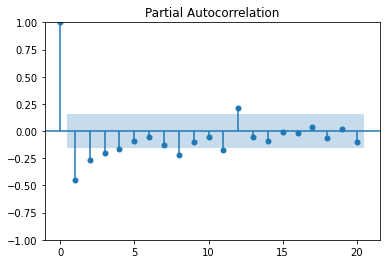

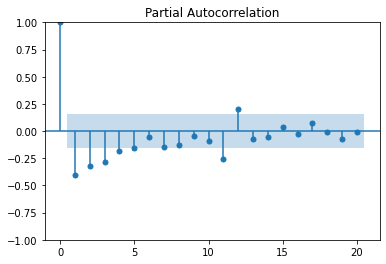

In [126]:
#PACF
#PACF
ploct =plot_pacf(ELET_df['ELET_diff'], lags=20, alpha=0.05) # 5 defasagens
ploct =plot_pacf(ELET_df['LN_ELET_DIFF'], lags=20, alpha=0.05) # 6 defasagens

In [127]:
indicadores = pd.read_excel('indicadores.xlsx', sheet_name= "normal")
indicadores['Data'] = pd.to_datetime(indicadores['Data'])
indicadores
indicadores['CAMBIO_diff'] = indicadores['CAMBIO'].diff()
indicadores['IBC-BR_diff'] = indicadores['IBC-BR'].diff()



#criando um dataframe com as variáveis que serão utilizadas
new_df = indicadores.loc[:, ['Data','IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'SELIC', 'IGP-M', 'DUMMY']]
new_df = new_df.dropna()
#new_df

#juntando um new_df com o  SBSP_df
df = pd.merge(ELET_df, new_df, on='Data')

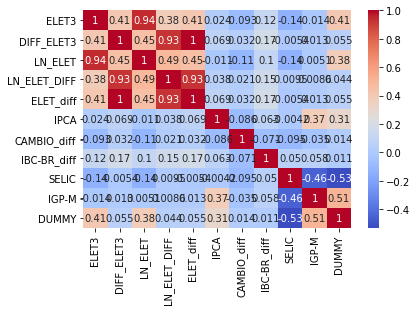

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [135]:
corr_matrix

,ELET3,DIFF_ELET3,LN_ELET,LN_ELET_DIFF,ELET_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
ELET3,1.000000,0.411784,0.941361,0.384167,0.411784,0.023845,-0.092748,0.115482,-0.136848,-0.013756,0.414252
DIFF_ELET3,0.411784,1.000000,0.450861,0.927732,1.000000,0.068854,0.032454,0.170933,-0.005371,0.013498,0.055383
LN_ELET,0.941361,0.450861,1.000000,0.489014,0.450861,-0.011282,-0.111534,0.101063,-0.136220,0.005075,0.375255
LN_ELET_DIFF,0.384167,0.927732,0.489014,1.000000,0.927732,0.038307,0.021440,0.152325,0.009511,0.008614,0.043919
ELET_diff,0.411784,1.000000,0.450861,0.927732,1.000000,0.068854,0.032454,0.170933,-0.005371,0.013498,0.055383
IPCA,0.023845,0.068854,-0.011282,0.038307,0.068854,1.000000,-0.085581,0.063397,-0.004209,0.373740,0.306642
CAMBIO_diff,-0.092748,0.032454,-0.111534,0.021440,0.032454,-0.085581,1.000000,-0.070746,-0.095265,-0.034637,0.014394
IBC-BR_diff,0.115482,0.170933,0.101063,0.152325,0.170933,0.063397,-0.070746,1.000000,0.049786,0.058237,0.011161
SELIC,-0.136848,-0.005371,-0.136220,0.009511,-0.005371,-0.004209,-0.095265,0.049786,1.000000,-0.457562,-0.529574
IGP-M,-0.013756,0.013498,0.005075,0.008614,0.013498,0.373740,-0.034637,0.058237,-0.457562,1.000000,0.509002


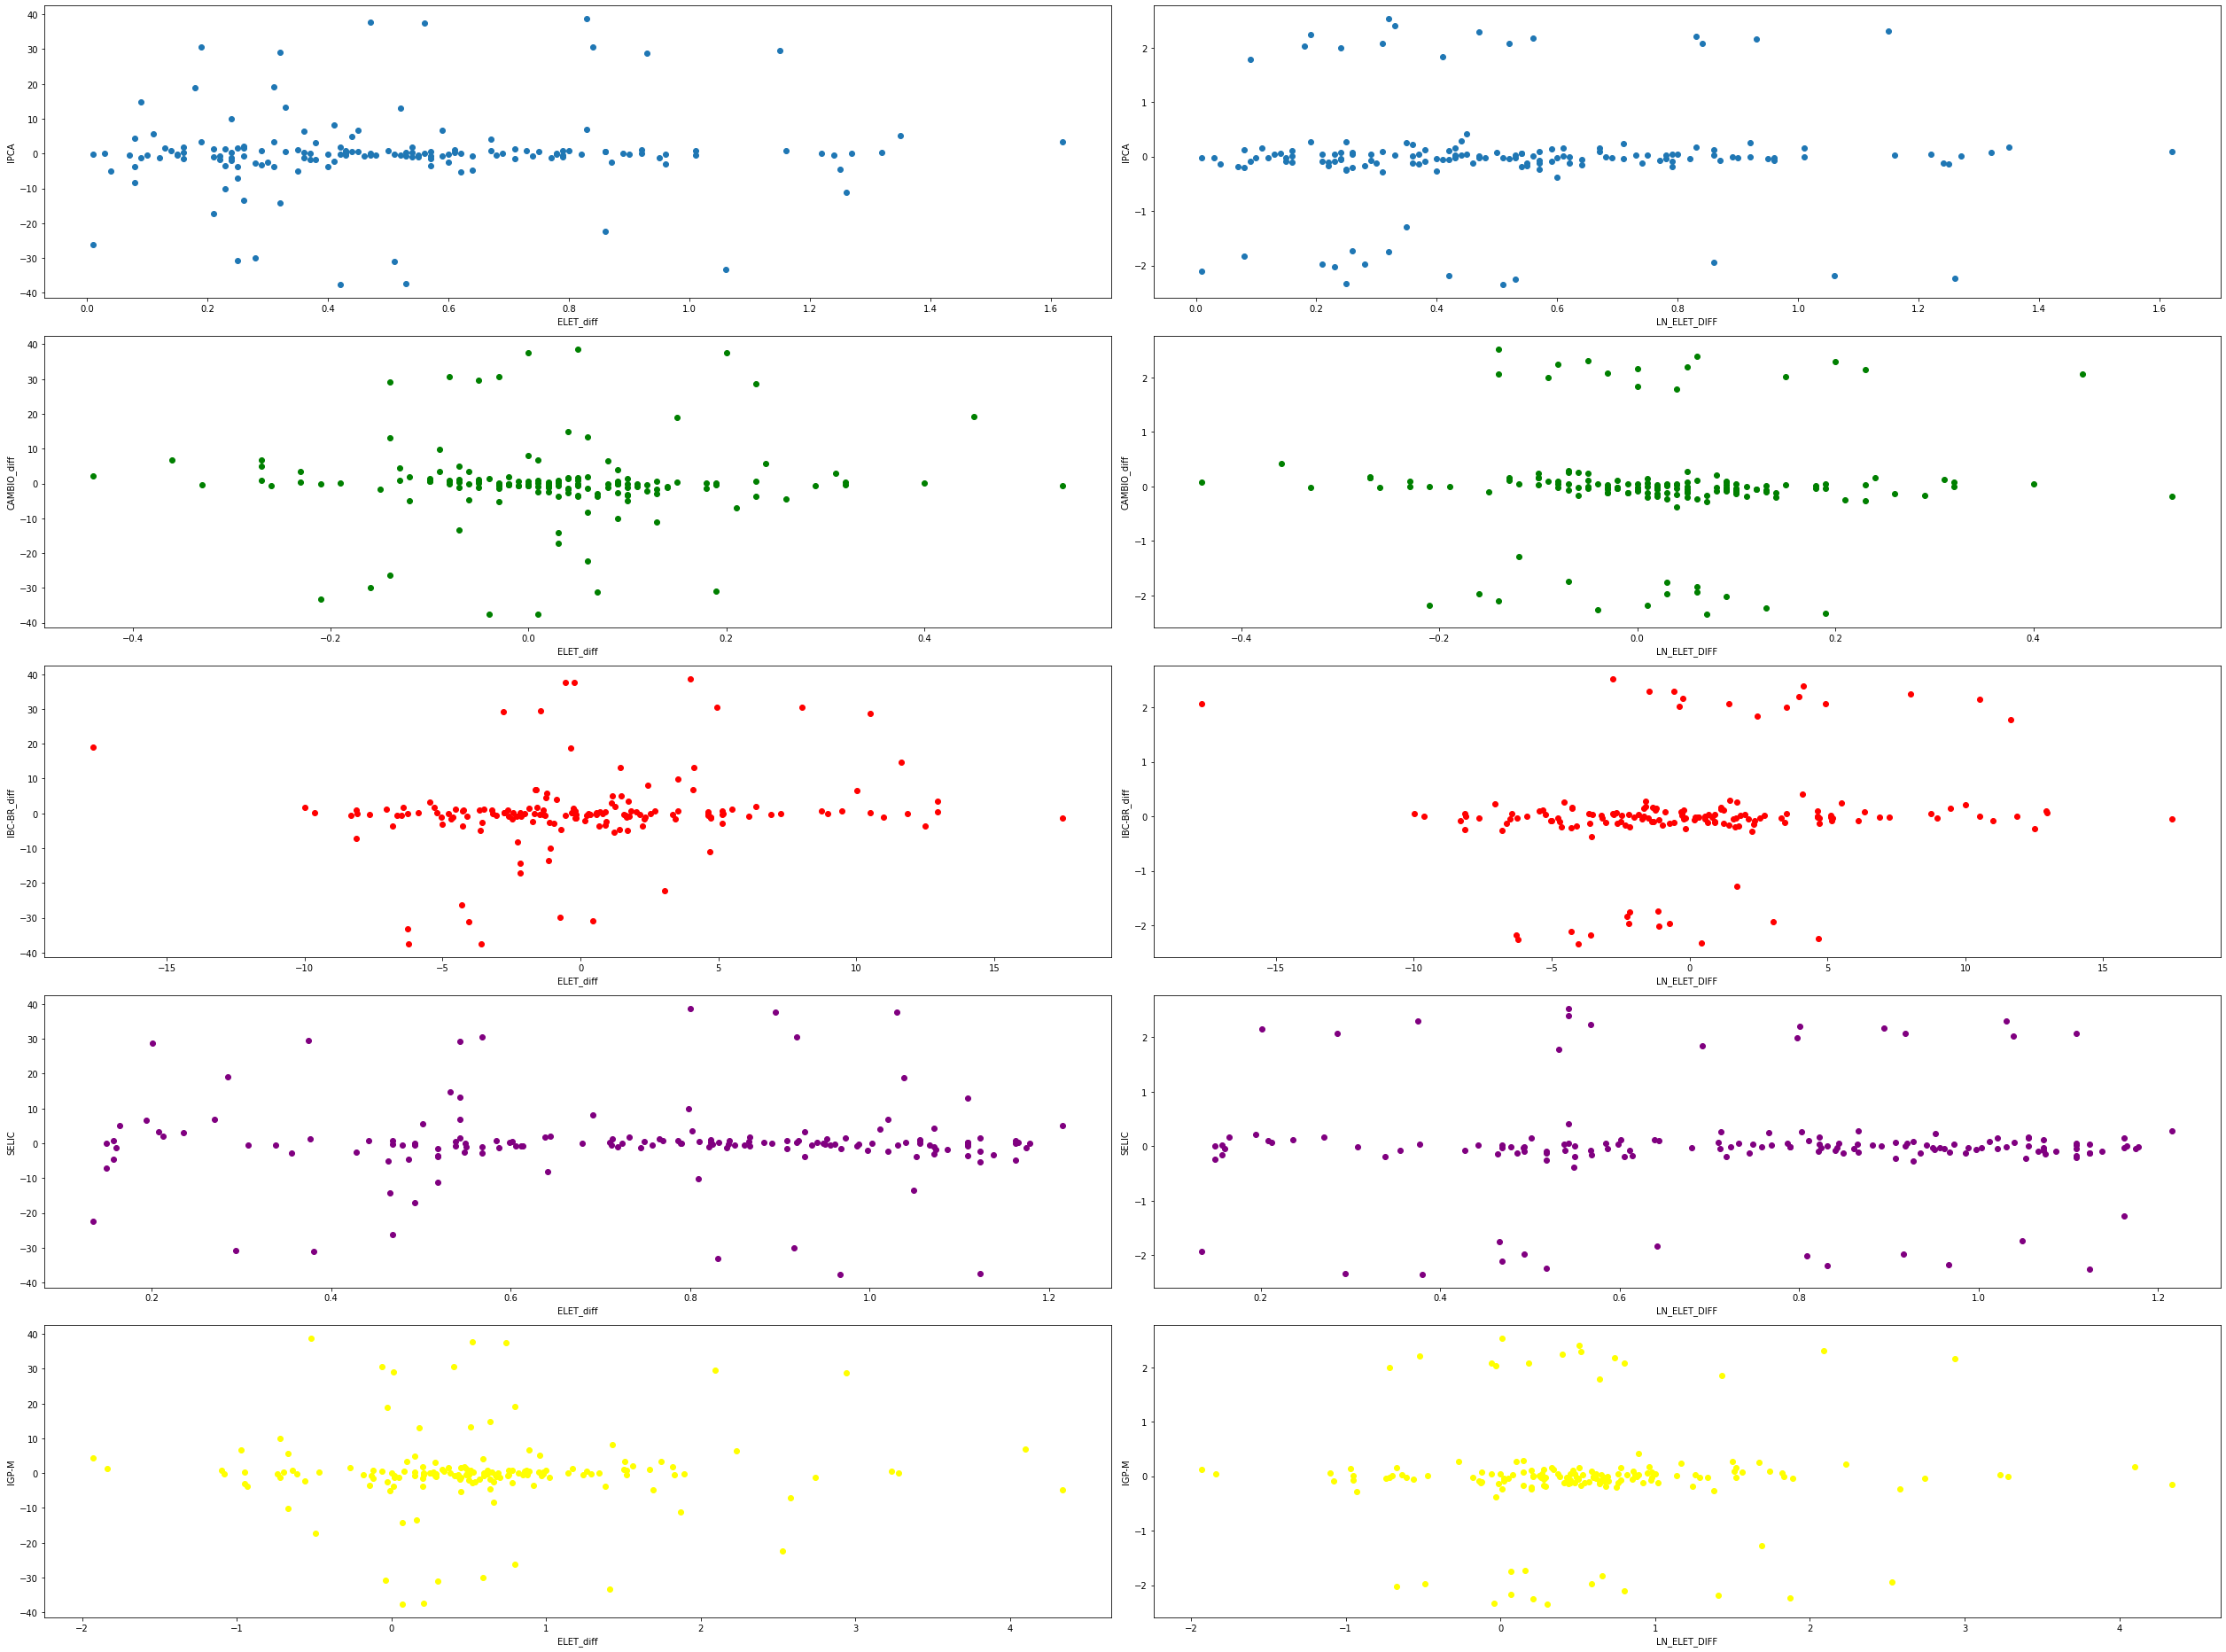

In [71]:
# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(35, 26))

# Scatter plot 1
axes[0, 0].scatter( df['IPCA'], df['ELET_diff'])
axes[0, 0].set_xlabel('ELET_diff')
axes[0, 0].set_ylabel('IPCA')

# Scatter plot 1
axes[0, 1].scatter( df['IPCA'], df['LN_ELET_DIFF'])
axes[0, 1].set_xlabel('LN_ELET_DIFF')
axes[0, 1].set_ylabel('IPCA')

# Scatter plot 2
axes[1, 0].scatter( df['CAMBIO_diff'], df['ELET_diff'], color='green')
axes[1, 0].set_xlabel('ELET_diff')
axes[1, 0].set_ylabel('CAMBIO_diff')

# Scatter plot 2
axes[1, 1].scatter( df['CAMBIO_diff'], df['LN_ELET_DIFF'], color='green')
axes[1, 1].set_xlabel('LN_ELET_DIFF')
axes[1, 1].set_ylabel('CAMBIO_diff')

# Scatter plot 3
axes[2, 0].scatter(df['IBC-BR_diff'] , df['ELET_diff'], color='red')
axes[2, 0].set_xlabel('ELET_diff')
axes[2, 0].set_ylabel('IBC-BR_diff')

axes[2, 1].scatter(df['IBC-BR_diff'] , df['LN_ELET_DIFF'], color='red')
axes[2, 1].set_xlabel('LN_ELET_DIFF')
axes[2, 1].set_ylabel('IBC-BR_diff')


# Scatter plot 4
axes[3, 0].scatter( df['SELIC'], df['ELET_diff'], color='purple')
axes[3, 0].set_xlabel('ELET_diff')
axes[3, 0].set_ylabel('SELIC')

axes[3, 1].scatter( df['SELIC'], df['LN_ELET_DIFF'], color='purple')
axes[3, 1].set_xlabel('LN_ELET_DIFF')
axes[3, 1].set_ylabel('SELIC')

axes[4, 0].scatter( df['IGP-M'], df['ELET_diff'], color='yellow')
axes[4, 0].set_xlabel('ELET_diff')
axes[4, 0].set_ylabel('IGP-M')

axes[4, 1].scatter( df['IGP-M'], df['LN_ELET_DIFF'], color='yellow')
axes[4, 1].set_xlabel('LN_ELET_DIFF')
axes[4, 1].set_ylabel('IGP-M')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [128]:
import statsmodels.api as sm

# Define the independent variables
X = df[[ 'IBC-BR_diff', 'CAMBIO_diff','DUMMY']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['LN_ELET_DIFF']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_ELET_DIFF   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.370
Date:                Wed, 12 Jun 2024   Prob (F-statistic):              0.254
Time:                        16:57:19   Log-Likelihood:                -208.54
No. Observations:                 158   AIC:                             425.1
Df Residuals:                     154   BIC:                             437.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0190      0.081     -0.234      

Tratamento de outliers

In [130]:
df = df.drop(columns=['Data'])
def remove_outliers(df, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers de um DataFrame utilizando quantis.

    :param df: DataFrame de entrada.
    :param lower_quantile: Limite inferior dos quantis (default: 0.05).
    :param upper_quantile: Limite superior dos quantis (default: 0.95).
    :return: DataFrame sem outliers.
    """
    # Calcula os quantis inferior e superior para cada coluna
    quantiles = df.quantile([lower_quantile, upper_quantile])
    
    # Inicializa uma máscara booleana para todos os valores serem verdadeiros
    mask = pd.Series([True] * len(df))
    
    for col in df.columns:
        # Gera uma máscara para cada coluna, considerando os quantis
        col_mask = (df[col] >= quantiles.loc[lower_quantile, col]) & (df[col] <= quantiles.loc[upper_quantile, col])
        # Combina as máscaras
        mask &= col_mask
    
    # Retorna o DataFrame sem os outliers
    return df[mask]

# Exemplo de uso
# df = pd.read_csv('seu_arquivo.csv')  # Carregar seu DataFrame aqui
# df_sem_outliers = remove_outliers(df)

df_sem_outliers = remove_outliers(df)
df_sem_outliers

,ELET3,DIFF_ELET3,LN_ELET,LN_ELET_DIFF,ELET_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
0,15.362772,0.719108,2.731947,0.047939,0.719108,0.80,0.00,3.52,0.843905,1.00,0
1,16.127641,0.764870,2.780535,0.048588,0.764870,0.79,-0.01,8.75,0.920465,0.62,0
2,14.975369,-1.152272,2.706407,-0.074128,-1.152272,0.77,-0.07,-5.04,0.840161,0.45,0
3,14.643663,-0.331706,2.684008,-0.022399,-0.331706,0.47,0.02,3.34,0.987988,0.43,0
4,14.238725,-0.404938,2.655965,-0.028042,-0.404938,0.15,-0.02,-1.48,0.956276,-0.18,0
...,...,...,...,...,...,...,...,...,...,...,...
130,32.583348,0.760701,3.483801,0.023623,0.760701,0.73,0.09,1.83,0.769089,0.87,1
142,41.847434,-5.345181,3.734030,-0.120207,-5.345181,0.62,-0.03,1.22,1.123316,0.45,0
149,38.650000,-1.100000,3.654547,-0.028063,-1.100000,0.12,-0.05,4.72,1.071983,-0.72,0
151,36.890000,1.630000,3.607941,0.045191,1.630000,0.26,0.04,-6.44,0.972910,0.37,0


In [131]:
import statsmodels.api as sm

# Define the independent variables
X = df_sem_outliers[['IPCA', 'SELIC','IGP-M', 'IBC-BR_diff','DUMMY']]
#X = df_sem_outliers[[ 'CAMBIO_diff',  'DUMMY', 'IBC-BR_diff']]
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df_sem_outliers['ELET_diff']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ELET_diff   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.4355
Date:                Wed, 12 Jun 2024   Prob (F-statistic):              0.822
Time:                        16:57:35   Log-Likelihood:                -227.80
No. Observations:                  82   AIC:                             467.6
Df Residuals:                      76   BIC:                             482.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5841      1.932     -0.302      

Tratamento de outlier + defasagem pelo PACF

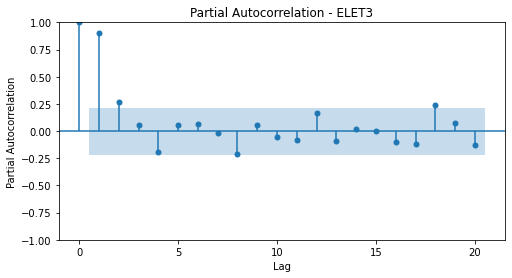

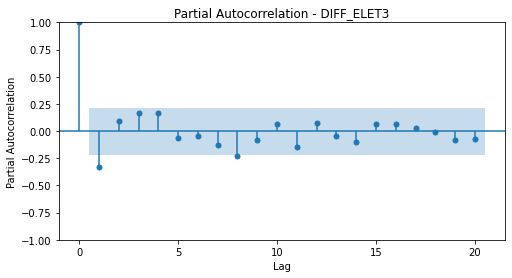

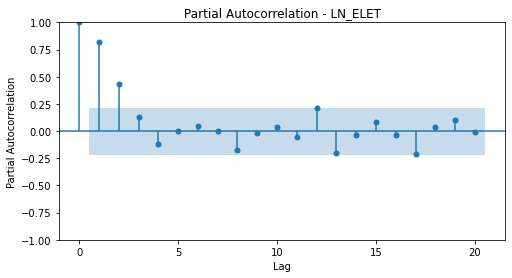

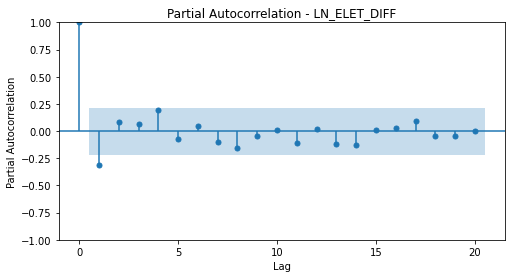

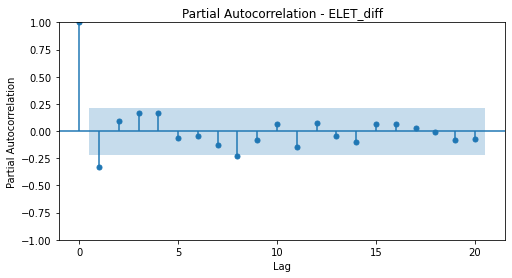

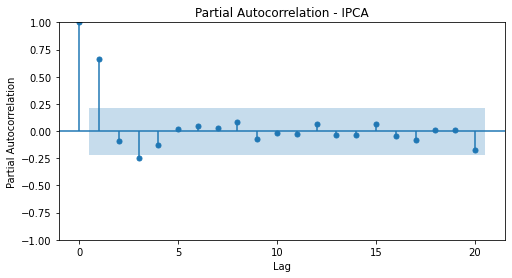

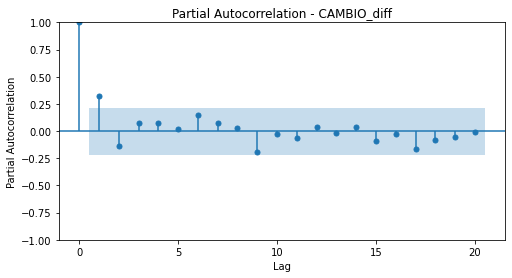

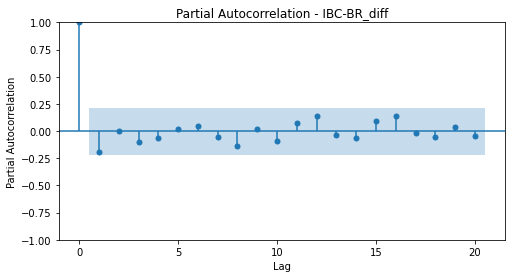

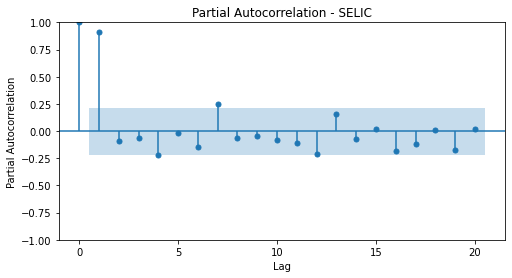

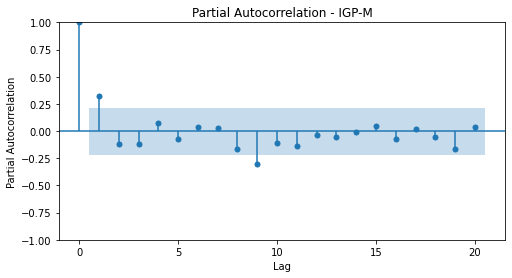

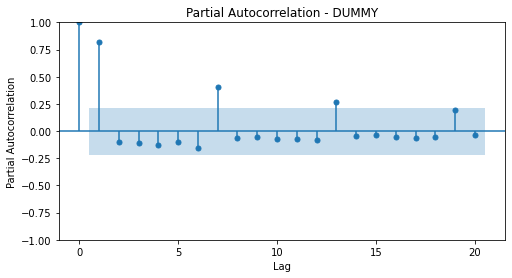

In [132]:
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt

# Iterate over each column in df_sem_outliers
for column in df_sem_outliers.columns:
    # Plot PACF for the current column
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_pacf(df_sem_outliers[column], ax=ax, lags=20)
    ax.set_title(f'Partial Autocorrelation - {column}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Partial Autocorrelation')
    plt.show()

In [133]:
ELETLAG = df_sem_outliers['LN_ELET_DIFF'].shift(2)
IPCA2LAG = df_sem_outliers['IPCA'].shift(2)
CAMBIO1LAG = df_sem_outliers['CAMBIO_diff'].shift(1)
IBCBR2LAG = df_sem_outliers['IBC-BR_diff'].shift(2)
CDI2LAG = df_sem_outliers['SELIC'].shift(2)
IGPM2LAG = df_sem_outliers['IGP-M'].shift(2)

data = pd.DataFrame({'ELETLAG': ELETLAG,
                    'CDI2LAG': CDI2LAG,
                    'IBCBR2LAG':IBCBR2LAG,
                    'IPCA2LAG': IPCA2LAG,
                    'CAMBIO1LAG' : CAMBIO1LAG,
                    'IGPM2LAG': IGPM2LAG,
                    'DUMMY': df['DUMMY']
                    })
data = data.dropna()

In [134]:
y = data['ELETLAG']
X = data[['CAMBIO1LAG','DUMMY' , 'IPCA2LAG' ]] 
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ELETLAG   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.554
Date:                Wed, 12 Jun 2024   Prob (F-statistic):             0.0616
Time:                        16:57:45   Log-Likelihood:                -59.485
No. Observations:                  80   AIC:                             127.0
Df Residuals:                      76   BIC:                             136.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2199      0.138      1.598      0.1

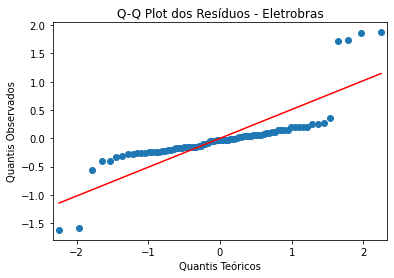

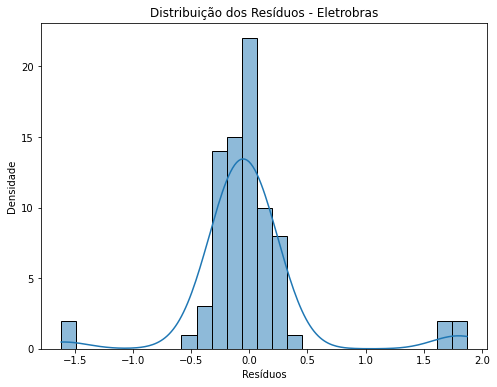

In [119]:

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos - Eletrobras')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos - Eletrobras')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

In [109]:
# Calculate VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

      feature       VIF
0       const  5.557554
1  CAMBIO1LAG  1.074797
2       DUMMY  1.021849
3    IPCA2LAG  1.080430
